In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/store.csv')

df1 = pd.read_csv('/content/drive/MyDrive/test.csv')

df2 = pd.read_csv('/content/drive/MyDrive/train.csv')

<ipython-input-3-7b4426da6110>:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/drive/MyDrive/train.csv')


In [4]:
print(df.shape)

print(df1.shape)

print(df2.shape)

(1115, 10)
(41088, 8)
(1017209, 9)


In [5]:
print(df.info())

print(df1.info())

print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
-

In [6]:
print(df.describe())

print(df1.describe())

print(df2.describe())

            Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1

In [7]:
print(df.isnull().sum())

print(df1.isnull().sum())

print(df2.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [8]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


In [9]:
from sklearn.impute import SimpleImputer

numerical_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])


In [10]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

In [11]:
# Identify categorical and numerical columns
categorical_cols = df1.select_dtypes(include=['object', 'category']).columns
numerical_cols = df1.select_dtypes(include=['int64', 'float64']).columns

In [12]:
from sklearn.impute import SimpleImputer

numerical_imputer = SimpleImputer(strategy='median')
df1[numerical_cols] = numerical_imputer.fit_transform(df1[numerical_cols])

In [13]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
df1[categorical_cols] = categorical_imputer.fit_transform(df1[categorical_cols])

In [14]:
print(df.isnull().sum())

print(df1.isnull().sum())

print(df2.isnull().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64
Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [15]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]

In [16]:
df=remove_outliers(df, 'CompetitionDistance')

In [17]:
df=remove_outliers(df, 'CompetitionOpenSinceMonth')

In [18]:
df=remove_outliers(df, 'CompetitionOpenSinceYear')

In [19]:
df=remove_outliers(df, 'Promo2SinceWeek')

In [20]:
df=remove_outliers(df, 'Promo2SinceYear')

In [21]:
df=remove_outliers(df, 'Store')

In [22]:
df=remove_outliers(df, 'Promo2')

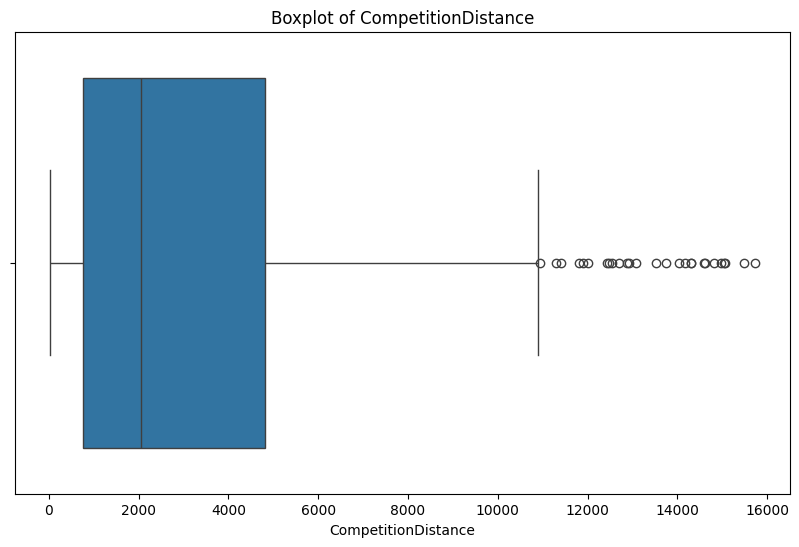

In [23]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CompetitionDistance'])
plt.title('Boxplot of CompetitionDistance')
plt.show()


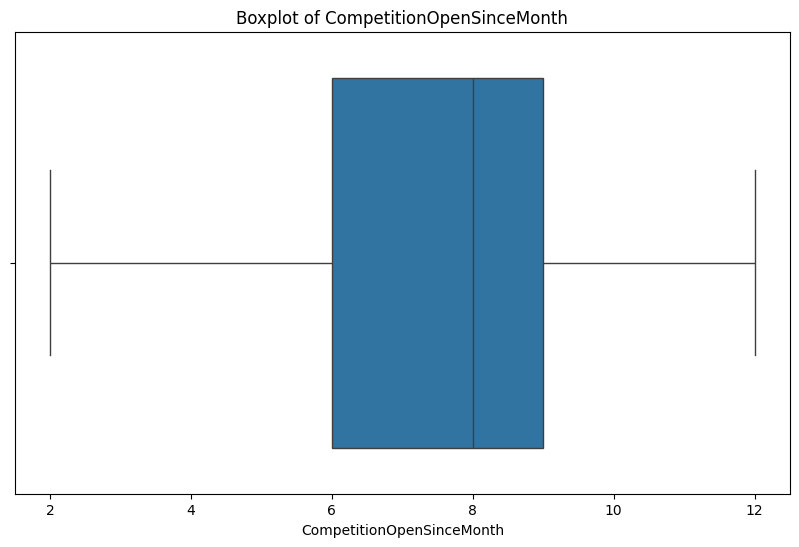

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CompetitionOpenSinceMonth'])
plt.title('Boxplot of CompetitionOpenSinceMonth')
plt.show()

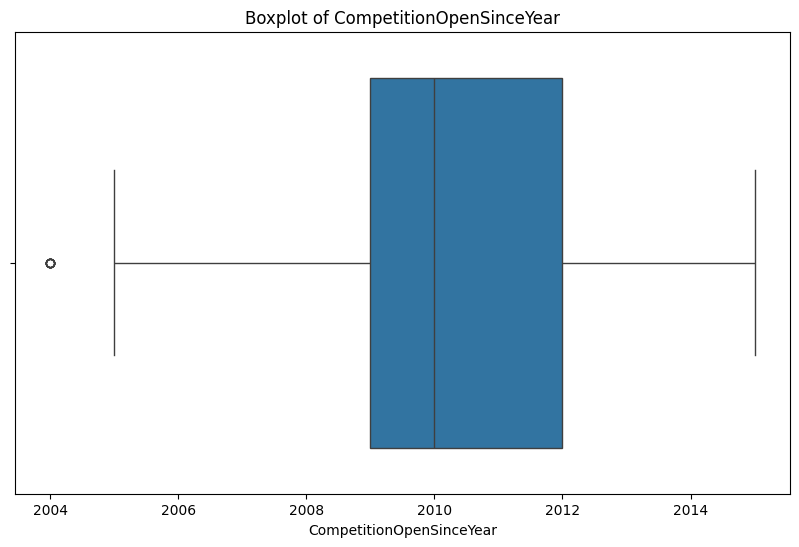

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CompetitionOpenSinceYear'])
plt.title('Boxplot of CompetitionOpenSinceYear')
plt.show()

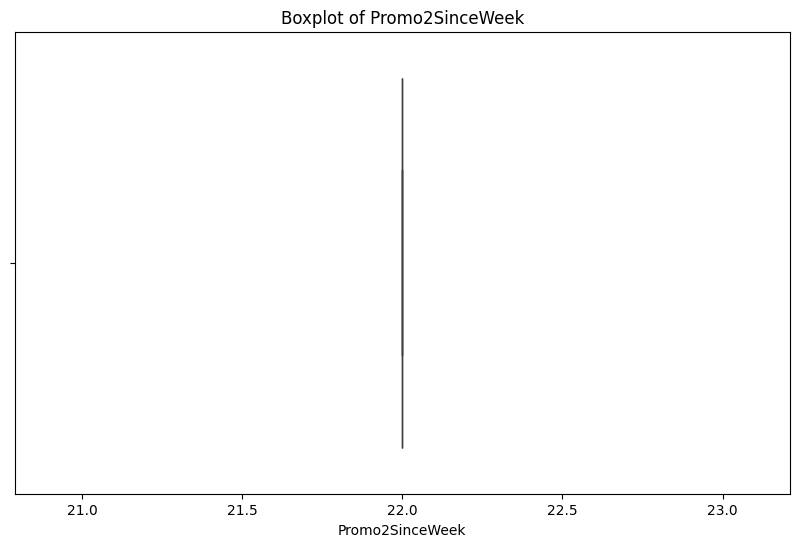

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Promo2SinceWeek'])
plt.title('Boxplot of Promo2SinceWeek')
plt.show()

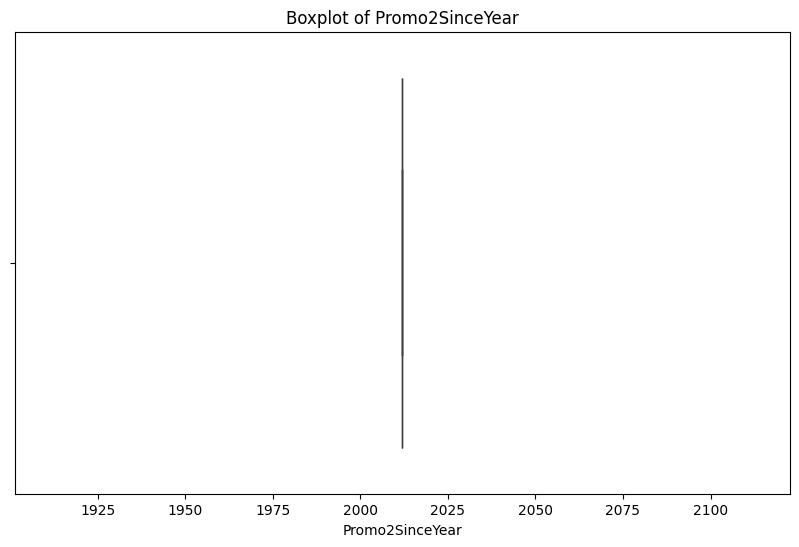

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Promo2SinceYear'])
plt.title('Boxplot of Promo2SinceYear')
plt.show()

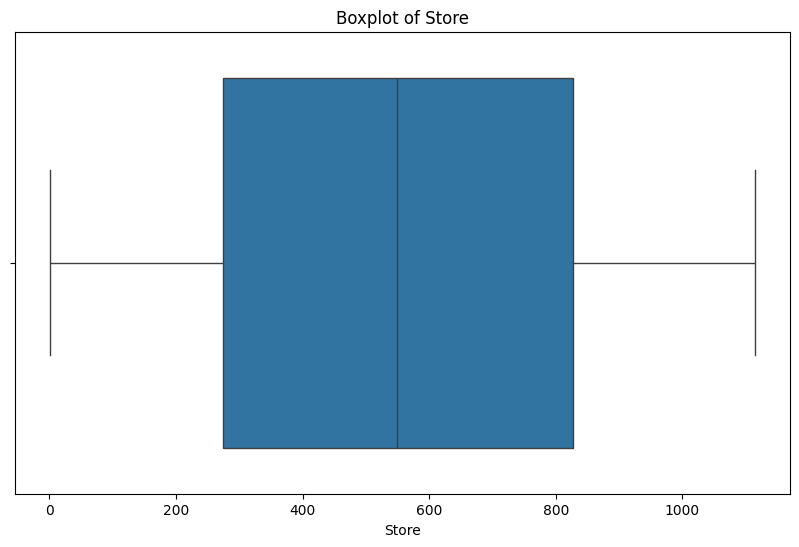

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Store'])
plt.title('Boxplot of Store')
plt.show()

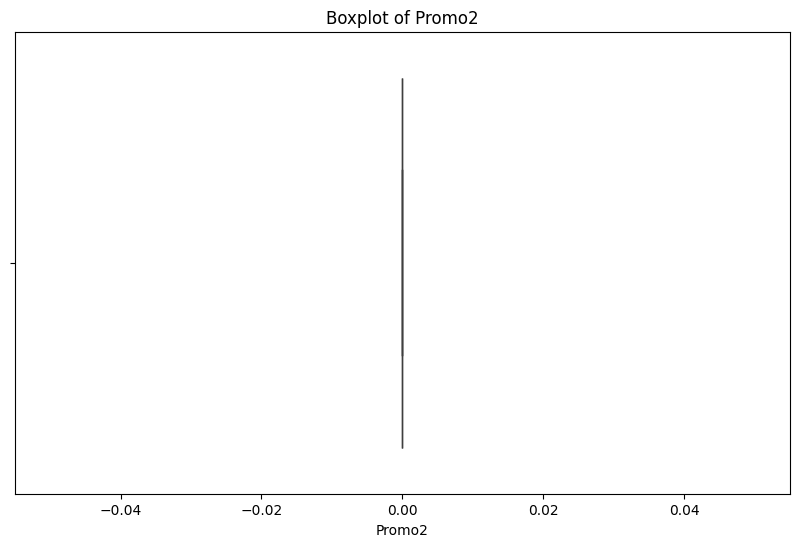

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Promo2'])
plt.title('Boxplot of Promo2')
plt.show()

In [30]:
def remove_outliers(df2, column):
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df1 = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]
    return df2[(df2[column]>=lower_bound) & (df2[column]<=upper_bound)]

In [31]:
#Removing outliers from the df2
df2=remove_outliers(df2, 'Sales')

In [32]:
df2=remove_outliers(df2, 'Customers')

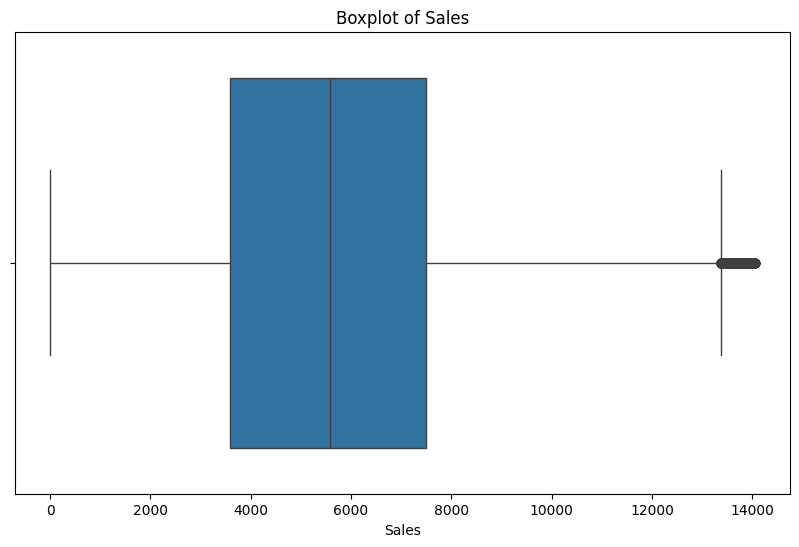

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df2['Sales'])
plt.title('Boxplot of Sales')
plt.show()

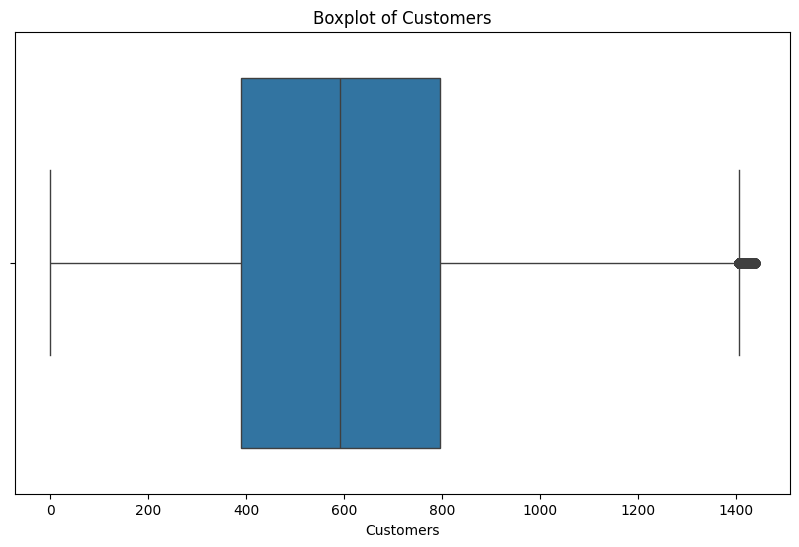

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df2['Customers'])
plt.title('Boxplot of Customers')
plt.show()

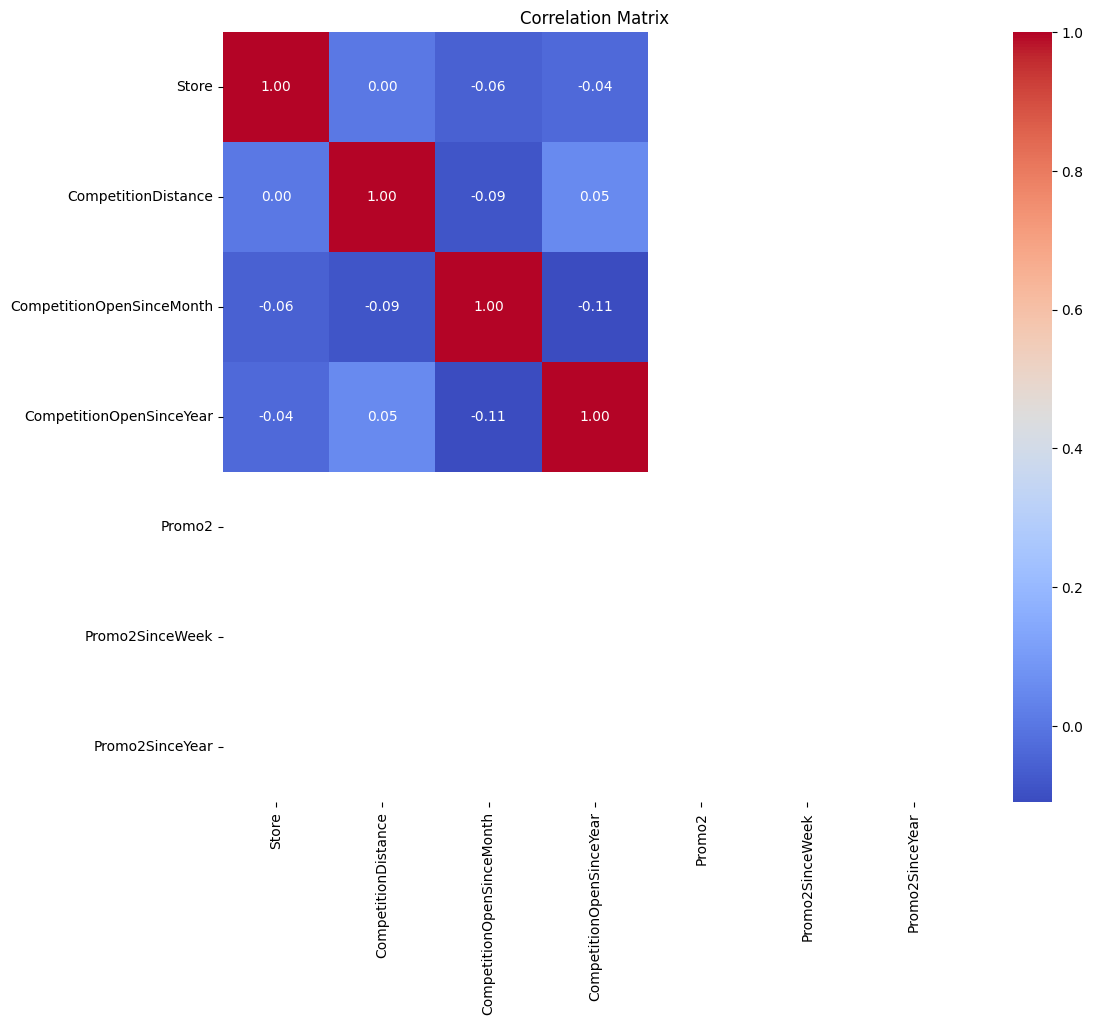

In [35]:
#Visualization: Generate insightful plots and summaries

# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

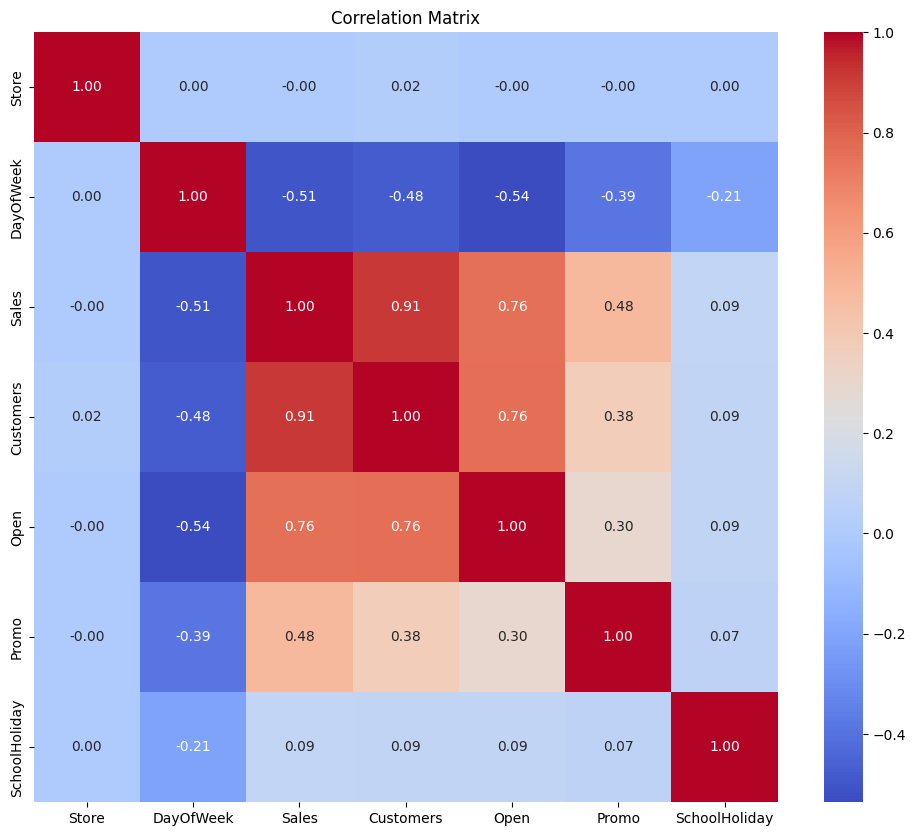

In [36]:
#Select only numerical features for correlation analysis
numerical_df2 = df2.select_dtypes(include=['number'])

correlation_matrix = numerical_df2.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

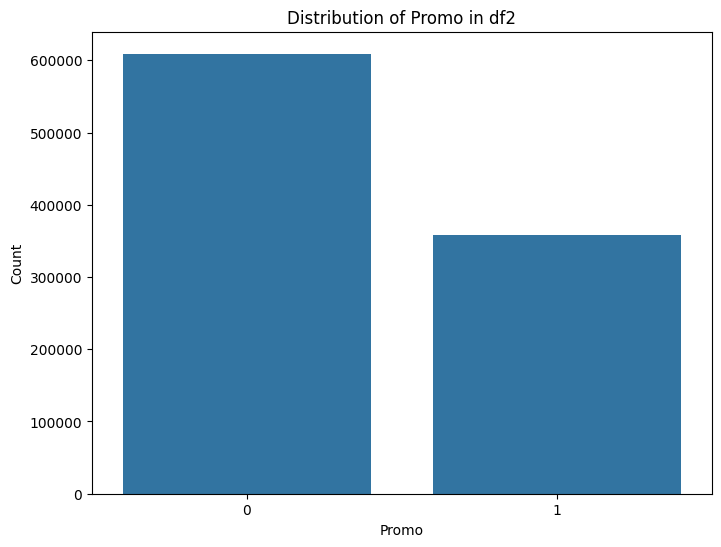

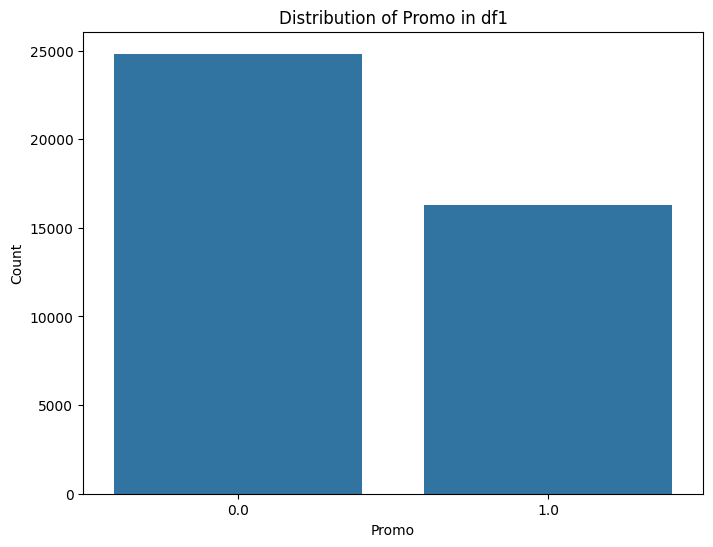

In [37]:
#Compare the distribution of promotions across df2 and df1
# For df2
plt.figure(figsize=(8, 6))
sns.countplot(x='Promo', data=df2)
plt.title('Distribution of Promo in df2')
plt.xlabel('Promo')
plt.ylabel('Count')
plt.show()

# For df1
plt.figure(figsize=(8, 6))
sns.countplot(x='Promo', data=df1)
plt.title('Distribution of Promo in df1')
plt.xlabel('Promo')
plt.ylabel('Count')
plt.show()


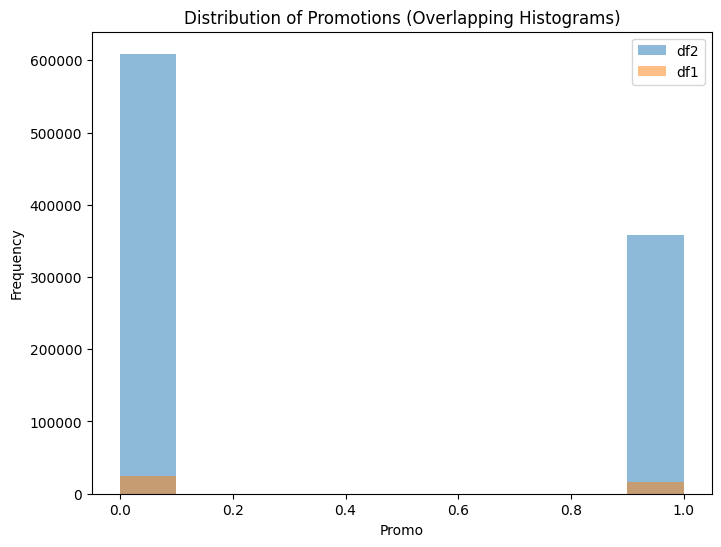

In [38]:
plt.figure(figsize=(8, 6))
plt.hist(df2['Promo'], bins=10, alpha=0.5, label='df2')
plt.hist(df1['Promo'], bins=10, alpha=0.5, label='df1')
plt.title('Distribution of Promotions (Overlapping Histograms)')
plt.xlabel('Promo')
plt.ylabel('Frequency')
plt.legend()
plt.show()

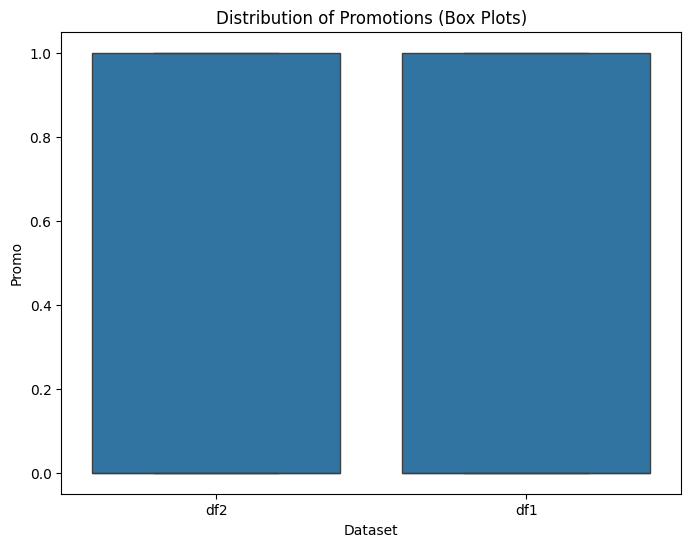

In [39]:
# Combine dataframes for plotting
df_combined = pd.concat([df2.assign(dataset='df2'), df1.assign(dataset='df1')])

plt.figure(figsize=(8, 6))
sns.boxplot(x='dataset', y='Promo', data=df_combined)
plt.title('Distribution of Promotions (Box Plots)')
plt.xlabel('Dataset')
plt.ylabel('Promo')
plt.show()

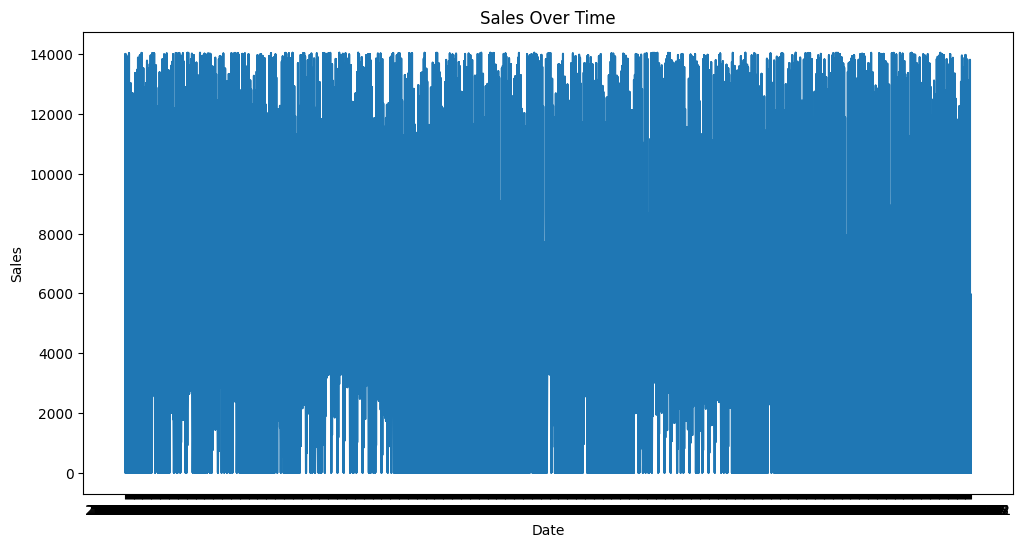

In [40]:
# Time Series Plots:

plt.figure(figsize=(12, 6))
plt.plot(df2['Date'], df2['Sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

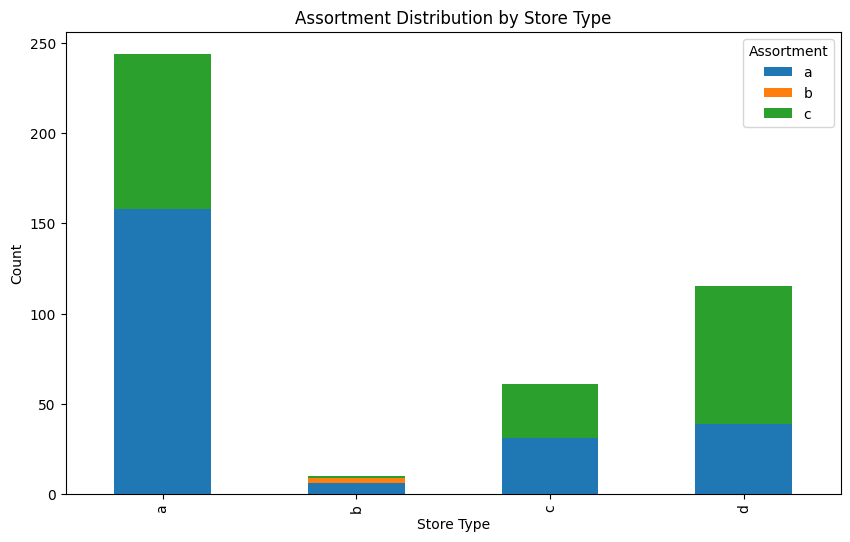

In [41]:
# Stacked Bar Charts:
store_type_assortment = pd.crosstab(df['StoreType'], df['Assortment'])
store_type_assortment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Assortment Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

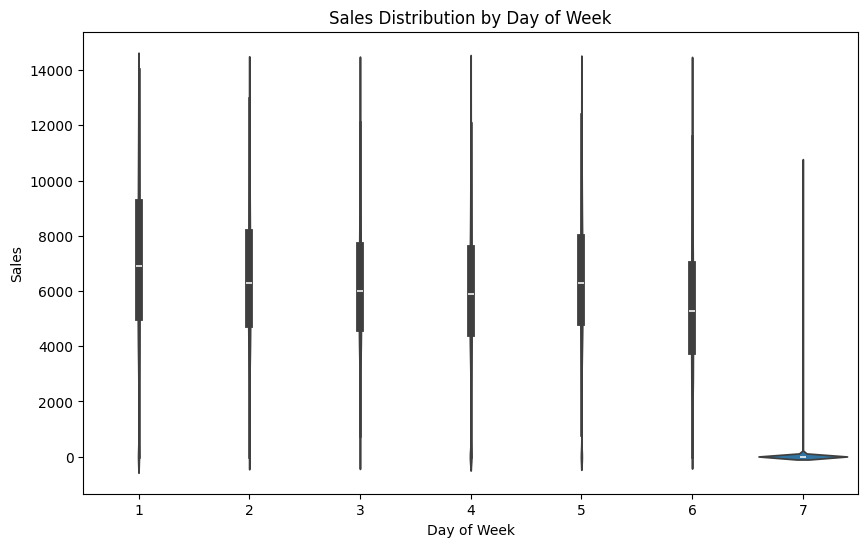

In [42]:
# Violin Plots:
plt.figure(figsize=(10, 6))
sns.violinplot(x='DayOfWeek', y='Sales', data=df2)
plt.title('Sales Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.show()

# **Analyze sales trends before, during, and after holiday**s

Prepare holiday data:
Create a list or dataframe containing the dates of the holidays you want to analyze.
Ensure the dates are in the same format as your 'Date' column in df2.
Define periods:
Create new columns in df2 to categorize each date as "before holiday", "during holiday", or "after holiday".
You can use a time window (e.g., 7 days before/after) to define these periods.

Christmas Sales - Mean: <bound method Series.mean of 241055    0
241056    0
241057    0
241058    0
241059    0
         ..
618035    0
618036    0
618037    0
618038    0
618039    0
Name: Sales, Length: 4066, dtype: int64>
Christmas Sales - Median: <bound method Series.median of 241055    0
241056    0
241057    0
241058    0
241059    0
         ..
618035    0
618036    0
618037    0
618038    0
618039    0
Name: Sales, Length: 4066, dtype: int64>
Christmas Sales - Standard Deviation: <bound method Series.std of 241055    0
241056    0
241057    0
241058    0
241059    0
         ..
618035    0
618036    0
618037    0
618038    0
618039    0
Name: Sales, Length: 4066, dtype: int64>


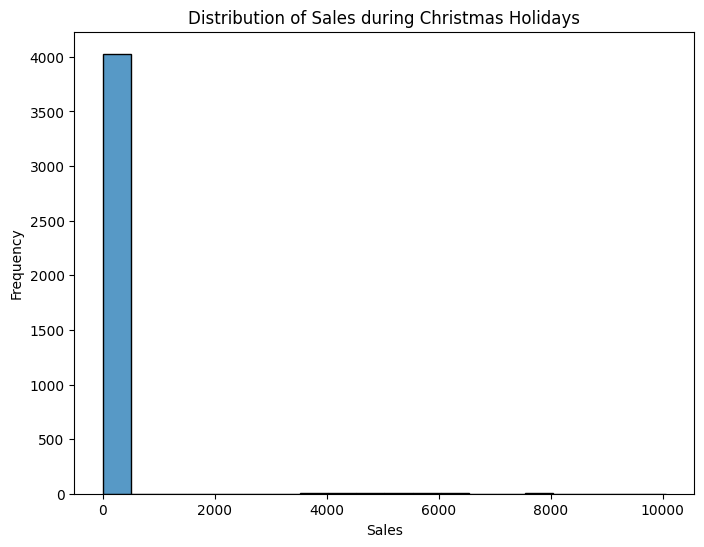

In [43]:
#  Deep Dive into Specific Holidays:

#Analyze sales during Christmas holidays
christmas_sales = df2.loc[df2['StateHoliday'] == 'c', 'Sales']  # Assuming 'c' represents Christmas in StateHoliday

# Print summary statistics
print(f"Christmas Sales - Mean: {christmas_sales.mean}")
print(f"Christmas Sales - Median: {christmas_sales.median}")
print(f"Christmas Sales - Standard Deviation: {christmas_sales.std}")

# Visualize trends (e.g., using a histogram or boxplot)
plt.figure(figsize=(8, 6))
sns.histplot(christmas_sales, bins=20)  # You can use other plot types like boxplot
plt.title('Distribution of Sales during Christmas Holidays')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


#Investigate seasonal purchasing patterns (e.g., Christmas, Easter).

Prepare holiday data:
Create a list or dataframe containing the dates of Christmas and Easter for the relevant years in the data.
Ensure the dates are in the same format as 'Date' column in df2.
Create seasonal indicators:
Add new columns to df2 to indicate whether a date falls within a specific seasonal period (e.g., Christmas season, Easter season).
You can define these periods based on a time window around the holiday dates (e.g., 2 weeks before and after Christmas).

In [44]:
# Assuming 'christmas_dates' and 'easter_dates' are lists of holiday dates
# Define Christmas dates for the relevant years
christmas_dates = ['2013-12-25', '2014-12-25', '2015-12-25']

# Define Easter dates for the relevant years
easter_dates = ['2013-03-31', '2014-04-20', '2015-04-05']

df2['ChristmasSeason'] = 0
df2['EasterSeason'] = 0

for date in christmas_dates:
    df2.loc[pd.to_datetime(df2['Date']).between(pd.to_datetime(date) - pd.Timedelta(days=14), pd.to_datetime(date) + pd.Timedelta(days=14)), 'ChristmasSeason'] = 1

for date in easter_dates:
    df2.loc[pd.to_datetime(df2['Date']).between(pd.to_datetime(date) - pd.Timedelta(days=14), pd.to_datetime(date) + pd.Timedelta(days=14)), 'EasterSeason'] = 1

**Analyze sales patterns**

Group data by the seasonal indicators and calculate summary statistics (e.g., mean, median, total sales).
Visualize sales patterns using bar charts or line plots.

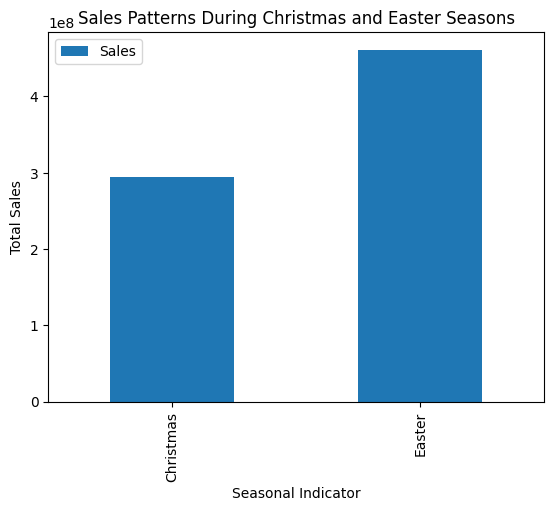

In [45]:
christmas_sales = df2[df2['ChristmasSeason'] == 1]['Sales'].sum()
easter_sales = df2[df2['EasterSeason'] == 1]['Sales'].sum()

# Create a new dataframe for plotting
sales_data = pd.DataFrame({'Season': ['Christmas', 'Easter'], 'Sales': [christmas_sales, easter_sales]})

# Plot the data
sales_data.plot(kind='bar', x='Season', y='Sales')
plt.title('Sales Patterns During Christmas and Easter Seasons')
plt.xlabel('Seasonal Indicator')
plt.ylabel('Total Sales')
plt.show()

In [46]:
#Assess correlations between sales and customer numbers.
#Calculate the correlation coefficient:

correlation = df2['Sales'].corr(df2['Customers'])
print(f"Correlation between Sales and Customers: {correlation}")



Correlation between Sales and Customers: 0.9132111487498072


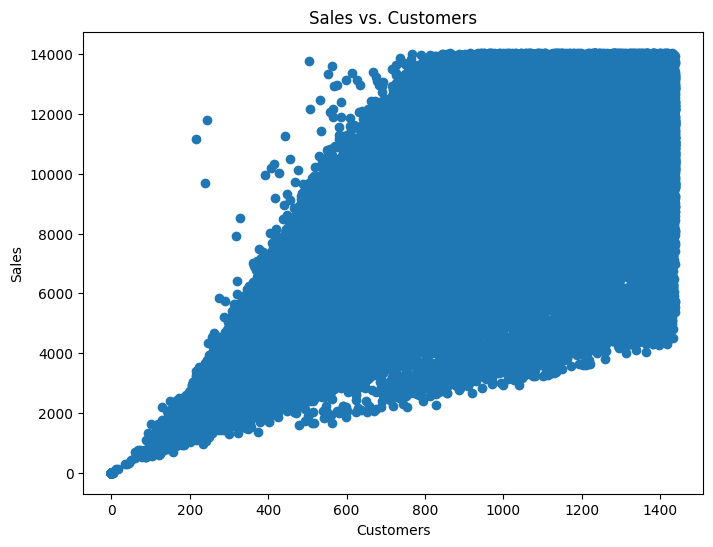

In [47]:
#Visualize the relationship:
plt.figure(figsize=(8, 6))
plt.scatter(df2['Customers'], df2['Sales'])
plt.title('Sales vs. Customers')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()


In [48]:
#Correlation for Specific Periods:
weekday_sales = df2[df2['DayOfWeek'] < 6]  # Days 1-5 are weekdays
weekend_sales = df2[df2['DayOfWeek'] >= 6]  # Days 6-7 are weekends

weekday_corr = weekday_sales['Sales'].corr(weekday_sales['Customers'])
weekend_corr = weekend_sales['Sales'].corr(weekend_sales['Customers'])

print(f"Weekday Correlation: {weekday_corr}")
print(f"Weekend Correlation: {weekend_corr}")


Weekday Correlation: 0.839229076341143
Weekend Correlation: 0.9572320146234167


In [49]:
df2['IsHoliday'] = df2['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

# Now proceed with correlation analysis
holiday_sales = df2[df2['IsHoliday'] == 1]
non_holiday_sales = df2[df2['IsHoliday'] == 0]

holiday_corr = holiday_sales['Sales'].corr(holiday_sales['Customers'])
non_holiday_corr = non_holiday_sales['Sales'].corr(non_holiday_sales['Customers'])

print(f"Holiday Correlation: {holiday_corr}")
print(f"Non-Holiday Correlation: {non_holiday_corr}")


Holiday Correlation: 0.9402709626854397
Non-Holiday Correlation: 0.9051985394305411


In [50]:
#Holidays vs. Non-Holidays:
# Check if 'IsHoliday' column exists in df2
if 'IsHoliday' in df2.columns:
    holiday_sales = df2[df2['IsHoliday'] == 1]
    non_holiday_sales = df2[df2['IsHoliday'] == 0]

    holiday_corr = holiday_sales['Sales'].corr(holiday_sales['Customers'])
    non_holiday_corr = non_holiday_sales['Sales'].corr(non_holiday_sales['Customers'])

    print(f"Holiday Correlation: {holiday_corr}")
    print(f"Non-Holiday Correlation: {non_holiday_corr}")
else:
    print("Column 'IsHoliday' not found in df2. Please check your data or previous code.")

Holiday Correlation: 0.9402709626854397
Non-Holiday Correlation: 0.9051985394305411


In [51]:
#Normalize the customers and sales for regression analysis for predictionn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2[['Customers', 'Sales']] = scaler.fit_transform(df2[['Customers', 'Sales']])


In [52]:
#Regression Analysis for Prediction:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = df2[['Customers']]  # Independent variable (customer numbers)
y = df2['Sales']  # Dependent variable (sales)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model (e.g., using R-squared, mean squared error)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.008983908385641708
R-squared (R2): 0.8345548772798466


In [53]:
predictions

array([0.230231  , 0.03146406, 0.57577967, ..., 0.03146406, 0.55559718,
       0.03146406])

In [54]:
#Evaluate the impact of promotions on customer behavior.
#Compare sales and customer numbers during promotional periods

promo_sales = df2[df2['Promo'] == 1]['Sales'].mean()
non_promo_sales = df2[df2['Promo'] == 0]['Sales'].mean()

promo_customers = df2[df2['Promo'] == 1]['Customers'].mean()
non_promo_customers = df2[df2['Promo'] == 0]['Customers'].mean()

print(f"Average Sales during Promotion: {promo_sales}")
print(f"Average Sales without Promotion: {non_promo_sales}")
print(f"Average Customers during Promotion: {promo_customers}")
print(f"Average Customers without Promotion: {non_promo_customers}")


Average Sales during Promotion: 0.526326193758809
Average Sales without Promotion: 0.29289231053943804
Average Customers during Promotion: 0.5138366800854101
Average Customers without Promotion: 0.32582844322949617


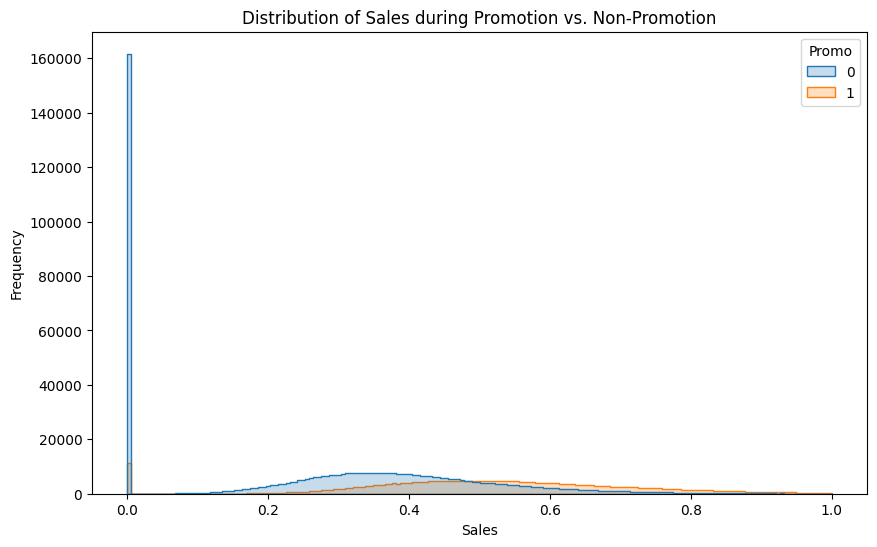

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='Sales', hue='Promo', element='step')
plt.title('Distribution of Sales during Promotion vs. Non-Promotion')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

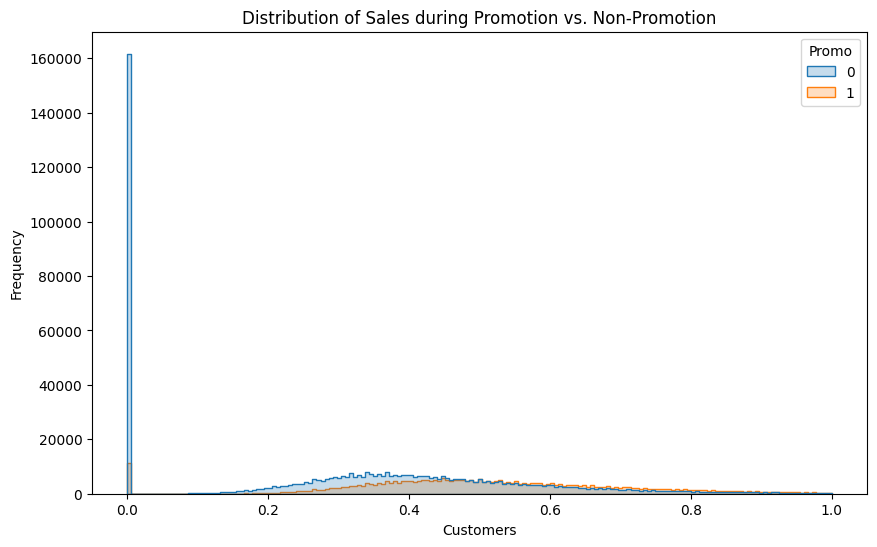

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='Customers', hue='Promo', element='step')
plt.title('Distribution of Sales during Promotion vs. Non-Promotion')
plt.xlabel('Customers')
plt.ylabel('Frequency')
plt.show()

In [57]:
# Merge the dataset df and df2(store and train dataset)
merged_df = pd.merge(df, df2, on='Store', how='inner')

In [58]:
merged_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,ChristmasSeason,EasterSeason,IsHoliday
0,1.0,c,a,1270.0,9.0,2008.0,0.0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-31,0.374617,0.385953,1,1,0,1,0,0,0
1,1.0,c,a,1270.0,9.0,2008.0,0.0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-30,0.357321,0.379694,1,1,0,1,0,0,0
2,1.0,c,a,1270.0,9.0,2008.0,0.0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-29,0.340380,0.363700,1,1,0,1,0,0,0
3,1.0,c,a,1270.0,9.0,2008.0,0.0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-28,0.356680,0.389430,1,1,0,1,0,0,0
4,1.0,c,a,1270.0,9.0,2008.0,0.0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-27,0.434337,0.425591,1,1,0,1,0,0,0


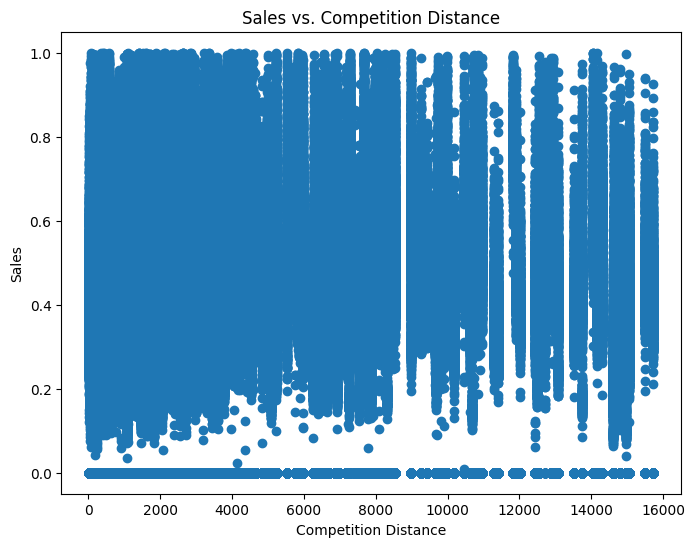

In [59]:
#Determine the effect of competitor distance on store sales.
#Visualize the relationship:

plt.figure(figsize=(8, 6))
plt.scatter(merged_df['CompetitionDistance'], merged_df['Sales'])
plt.title('Sales vs. Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()

In [60]:
#Calculate the correlation coefficient:

correlation = merged_df['CompetitionDistance'].corr(merged_df['Sales'])
print(f"Correlation between Competition Distance and Sales: {correlation}")

Correlation between Competition Distance and Sales: 0.030830452866806683


In [61]:
import statsmodels.formula.api as sm

# Check if 'Location' column exists in merged_df
print(merged_df.columns)  # Print columns to verify 'Location' presence

# Assuming 'StoreLocation' is the actual column name for location
model = sm.ols('Sales ~ CompetitionDistance + StoreType + Promo', data=merged_df)

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'ChristmasSeason', 'EasterSeason', 'IsHoliday'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                 2.227e+04
Date:                Thu, 02 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:40:49   Log-Likelihood:                 52984.
No. Observations:              373570   AIC:                        -1.060e+05
Df Residuals:                  373564   BIC:                       

In [62]:
# Explore how assortment types influence sale
assortment_sales = merged_df.groupby('Assortment')['Sales'].mean()
print(assortment_sales)

Assortment
a    0.378319
b    0.317296
c    0.409101
Name: Sales, dtype: float64


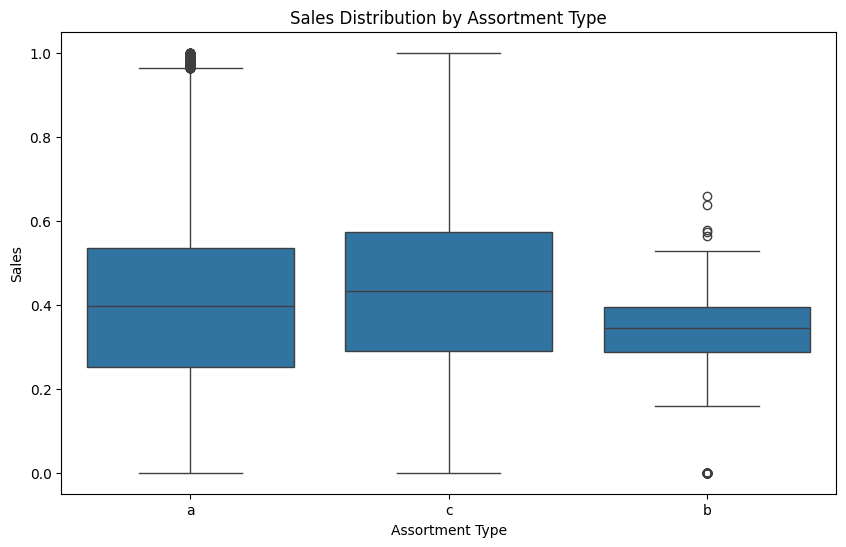

In [63]:
#Visualize sales distribution for each assortment type:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Assortment', y='Sales', data=merged_df)
plt.title('Sales Distribution by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Sales')
plt.show()


In [64]:
#Perform statistical tests:

import statsmodels.formula.api as sm

model = sm.ols('Sales ~ Assortment', data=merged_df)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     788.2
Date:                Thu, 02 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:40:54   Log-Likelihood:                 5040.8
No. Observations:              373570   AIC:                        -1.008e+04
Df Residuals:                  373567   BIC:                        -1.004e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3783      0.001    7

<Axes: >

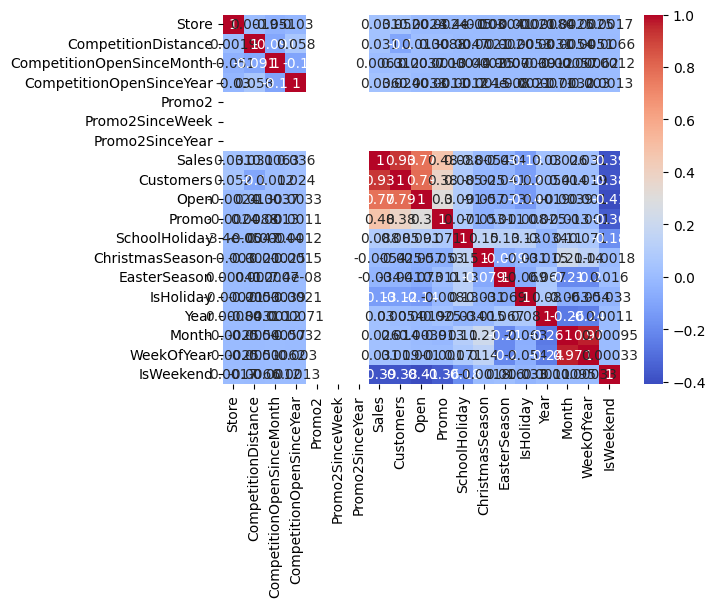

In [65]:
# Convert 'Date' to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Extract year, month, and day
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['DayOfWeek'] = merged_df['DayOfWeek'].astype('category')
merged_df['WeekOfYear'] = merged_df['Date'].dt.isocalendar().week

# Create a binary feature for weekends (Saturday and Sunday)
merged_df['IsWeekend'] = merged_df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Drop the original 'Date' column
merged_df = merged_df.drop(columns=['Date'])

# ----> The fix: Add numeric_only=True to .corr() call <----
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap="coolwarm")

<ipython-input-68-b0cd73956444>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby('DayOfWeek')['Sales'].sum().plot(kind='bar')


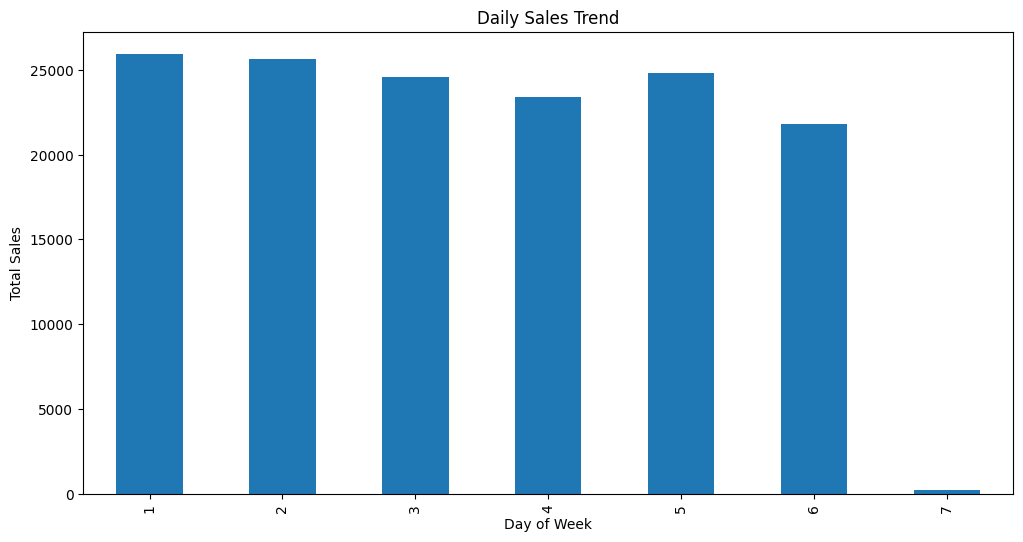

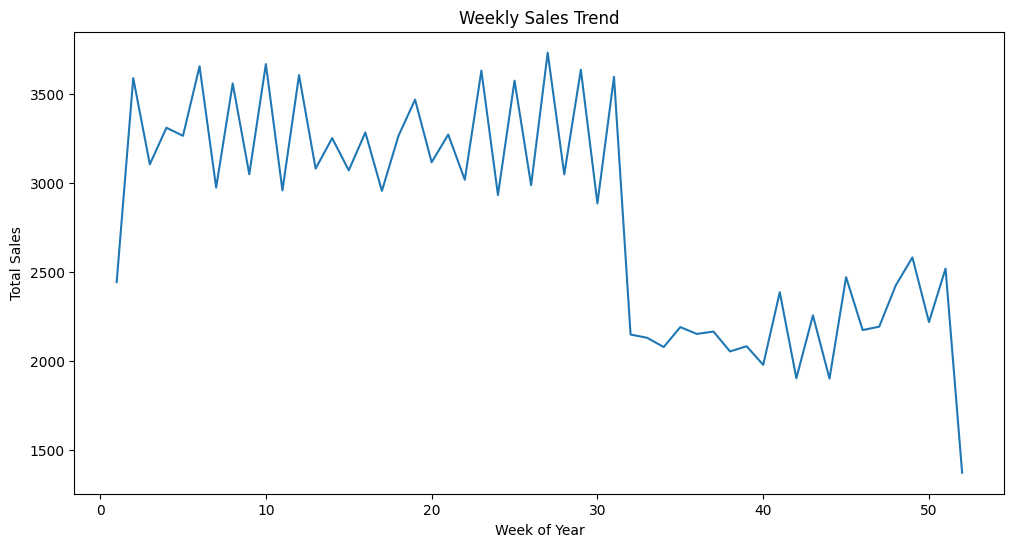

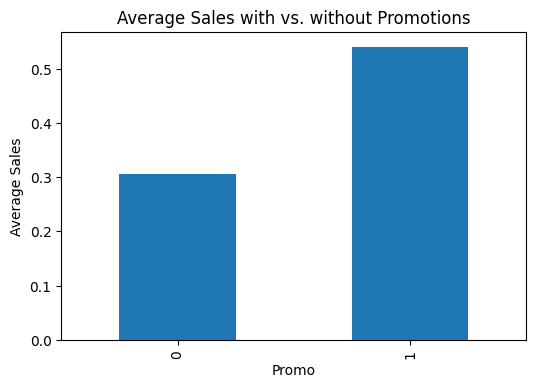

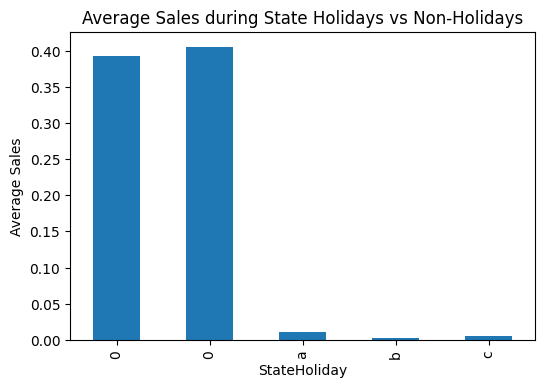

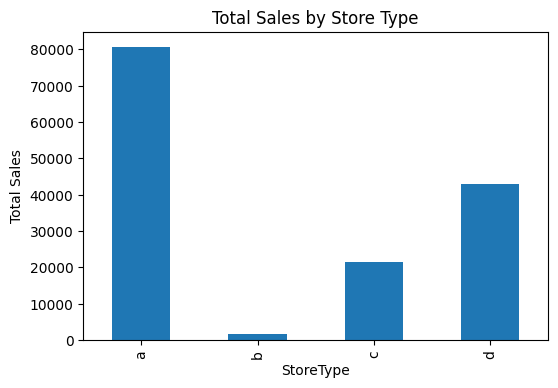

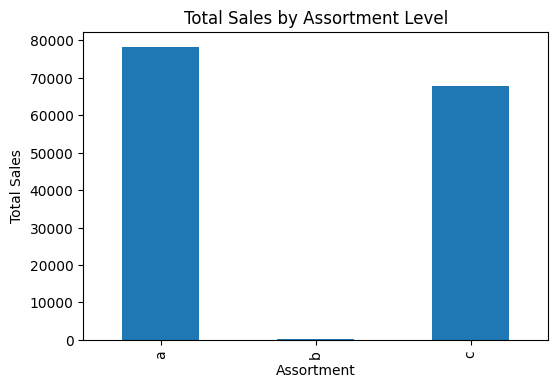

Top 10 Performing Stores:
 Store
1075.0    586.113318
525.0     549.348281
527.0     538.846324
1066.0    538.412627
807.0     535.480105
599.0     518.945477
233.0     514.819702
799.0     511.230052
578.0     510.876575
1089.0    509.013311
Name: Sales, dtype: float64


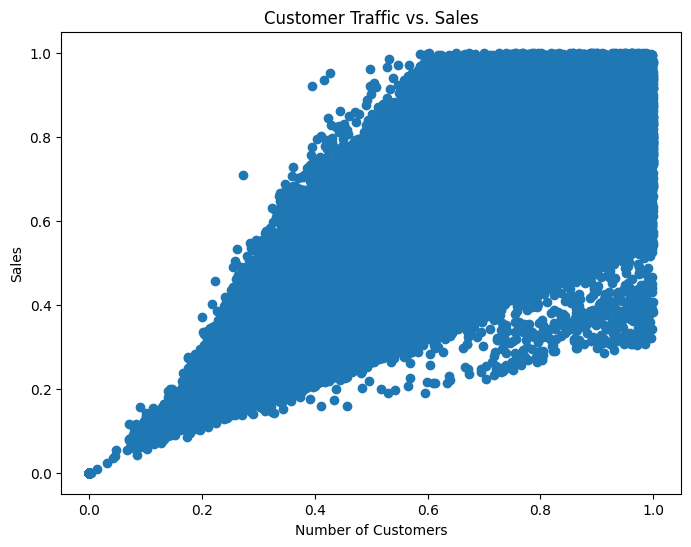


Average Spending per Customer: 0.91


In [68]:
# Daily Sales Trend
plt.figure(figsize=(12, 6))
merged_df.groupby('DayOfWeek')['Sales'].sum().plot(kind='bar')
plt.title('Daily Sales Trend')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.show()

# Weekly Sales Trend (using WeekOfYear)
plt.figure(figsize=(12, 6))
merged_df.groupby('WeekOfYear')['Sales'].sum().plot()
plt.title('Weekly Sales Trend')
plt.xlabel('Week of Year')
plt.ylabel('Total Sales')
plt.show()

# Impact of Promotions on Sales
promo_sales = merged_df.groupby('Promo')['Sales'].mean()
promo_sales.plot(kind='bar', figsize=(6, 4))
plt.title('Average Sales with vs. without Promotions')
plt.ylabel('Average Sales')
plt.show()

# Impact of Holidays on Sales
holiday_sales = merged_df.groupby('StateHoliday')['Sales'].mean()
holiday_sales.plot(kind='bar', figsize=(6, 4))
plt.title('Average Sales during State Holidays vs Non-Holidays')
plt.ylabel('Average Sales')
plt.show()

# 2. Store Performance:

# Sales Distribution by Store Type
store_type_sales = merged_df.groupby('StoreType')['Sales'].sum()
store_type_sales.plot(kind='bar', figsize=(6, 4))
plt.title('Total Sales by Store Type')
plt.ylabel('Total Sales')
plt.show()

# Sales Distribution by Assortment Level
assortment_sales = merged_df.groupby('Assortment')['Sales'].sum()
assortment_sales.plot(kind='bar', figsize=(6, 4))
plt.title('Total Sales by Assortment Level')
plt.ylabel('Total Sales')
plt.show()

# Top 10 Performing Stores
top_stores = merged_df.groupby('Store')['Sales'].sum().nlargest(10)
print("Top 10 Performing Stores:\n", top_stores)

# 3. Customer Behavior:

# Relationship between Customer Traffic and Sales
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Customers'], merged_df['Sales'])
plt.title('Customer Traffic vs. Sales')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

# Average Spending per Customer
avg_spending = merged_df['Sales'].sum() / merged_df['Customers'].sum()
print(f"\nAverage Spending per Customer: {avg_spending:.2f}")

<ipython-input-69-4d9b8c9ca6b0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_trends = merged_df.groupby(['DayOfWeek', 'Promo'])['Sales'].mean().reset_index()


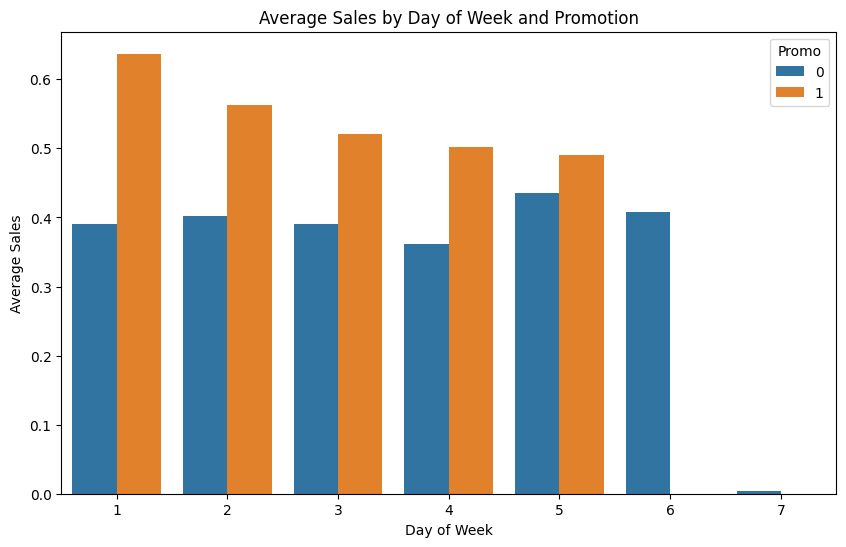

In [69]:
# Group data by DayOfWeek and Promo and calculate average sales
sales_trends = merged_df.groupby(['DayOfWeek', 'Promo'])['Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Sales', hue='Promo', data=sales_trends)
plt.title('Average Sales by Day of Week and Promotion')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.show()

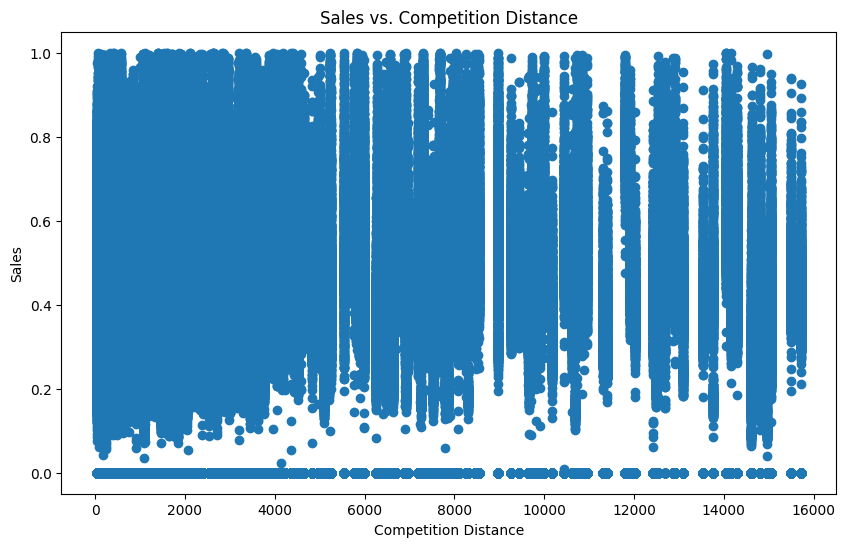

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['CompetitionDistance'], merged_df['Sales'])
plt.title('Sales vs. Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Select features and target
features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'Month', 'Year', 'WeekOfYear', 'IsHoliday']
target = 'Sales'

X = merged_df[features]
y = merged_df[target]

# One-hot encode categorical features
categorical_features = ['StoreType', 'Assortment', 'StateHoliday']  # Add other categorical features as needed

# ----> The fix: Convert columns to string type before encoding <----
for col in categorical_features:
    X[col] = X[col].astype(str)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for compatibility with some models
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_features]))
X_encoded.columns = encoder.get_feature_names_out(categorical_features)
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, X_encoded], axis=1)


<ipython-input-71-aeaafde449b3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
<ipython-input-71-aeaafde449b3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
<ipython-input-71-aeaafde449b3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [72]:
#Handle missing values and scale data.

# 1. Handle Missing Values:

# a. Numerical Features: Impute with median (or mean)
from sklearn.preprocessing import StandardScaler

numerical_features = merged_df.select_dtypes(include=['number']).columns
numerical_imputer = SimpleImputer(strategy='median')  # Or strategy='mean'
merged_df[numerical_features] = numerical_imputer.fit_transform(merged_df[numerical_features])

# b. Categorical Features: Impute with most frequent
categorical_features = merged_df.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
merged_df[categorical_features] = categorical_imputer.fit_transform(merged_df[categorical_features])

# 2. Scale Data:

# a. Select features to scale (usually numerical features)
features_to_scale = numerical_features  # Or specify a list of features

# b. Create a StandardScaler object
scaler = StandardScaler()

# c. Apply scaling
merged_df[features_to_scale] = scaler.fit_transform(merged_df[features_to_scale])



In [73]:
merged_df[features_to_scale]

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Sales,Customers,Open,Promo,SchoolHoliday,ChristmasSeason,EasterSeason,IsHoliday,Year,Month,WeekOfYear,IsWeekend
0,-1.715633,-0.629440,0.546861,-0.726621,0.0,0.0,0.0,-0.072319,-0.167287,0.471219,1.309752,2.131546,-0.248857,-0.319169,-0.447206,1.511843,0.326774,0.492318,1.135244
1,-1.715633,-0.629440,0.546861,-0.726621,0.0,0.0,0.0,-0.144620,-0.191741,0.471219,1.309752,2.131546,-0.248857,-0.319169,-0.447206,1.511843,0.326774,0.492318,-0.880868
2,-1.715633,-0.629440,0.546861,-0.726621,0.0,0.0,0.0,-0.215433,-0.254236,0.471219,1.309752,2.131546,-0.248857,-0.319169,-0.447206,1.511843,0.326774,0.492318,-0.880868
3,-1.715633,-0.629440,0.546861,-0.726621,0.0,0.0,0.0,-0.147297,-0.153701,0.471219,1.309752,2.131546,-0.248857,-0.319169,-0.447206,1.511843,0.326774,0.492318,-0.880868
4,-1.715633,-0.629440,0.546861,-0.726621,0.0,0.0,0.0,0.177313,-0.012408,0.471219,1.309752,2.131546,-0.248857,-0.319169,-0.447206,1.511843,0.326774,0.492318,-0.880868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373565,1.766904,-0.736394,0.168273,0.008482,0.0,0.0,0.0,-1.638244,-1.675316,-2.122157,-0.763503,-0.469143,-0.248857,-0.319169,-0.447206,-1.090538,-1.474106,-1.374660,1.135244
373566,1.766904,-0.736394,0.168273,0.008482,0.0,0.0,0.0,-1.638244,-1.675316,-2.122157,-0.763503,-0.469143,-0.248857,-0.319169,-0.447206,-1.090538,-1.474106,-1.443807,1.135244
373567,1.766904,-0.736394,0.168273,0.008482,0.0,0.0,0.0,-1.638244,-1.675316,-2.122157,-0.763503,-0.469143,-0.248857,-0.319169,-0.447206,-1.090538,-1.474106,-1.512955,1.135244
373568,1.766904,-0.736394,0.168273,0.008482,0.0,0.0,0.0,-1.638244,-1.675316,-2.122157,-0.763503,-0.469143,-0.248857,-0.319169,-0.447206,-1.090538,-1.474106,-1.582102,1.135244


In [75]:
#Machine Learning Models with Scikit-learn Pipelines:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# 1. Data Preparation:

# Select features and target
features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
            'StoreType', 'Assortment', 'CompetitionDistance',
            'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
            'Promo2SinceWeek', 'Promo2SinceYear', 'Month', 'Year',
            'WeekOfYear', 'IsHoliday', 'IsWeekend']  # Include 'IsWeekend' if created
target = 'Sales'

X = merged_df[features]
y = merged_df[target]

# 2. Create Preprocessing Pipeline:

# a. Define numerical and categorical features
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# ----> The fix: Convert columns to string type before encoding <----
for col in categorical_features:
    X[col] = X[col].astype(str)


# b. Create transformers for numerical and categorical features
numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
    ]
)

# c. Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ]
)

# 3. Create Machine Learning Pipeline:

# a. Choose your model (e.g., LinearRegression)
model = RandomForestRegressor(random_state=42)
# b. Combine preprocessor and model in a Pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', model),
    ]
)

# 4. Train and Evaluate:

# a. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# b. Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# c. Make predictions on the test data
predictions = pipeline.predict(X_test)

# d. Evaluate the model (e.g., using R-squared, mean squared error)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")

<ipython-input-75-265a09a59c3c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
<ipython-input-75-265a09a59c3c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
<ipython-input-75-265a09a59c3c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

Mean Squared Error (MSE): 0.05128220811036524


In [76]:
#Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# b. Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# c. Make predictions on the test data
predictions = pipeline.predict(X_test)

# d. Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)  # Calculate RMSE
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")






Mean Squared Error (MSE): 0.05128220811036524
Root Mean Squared Error (RMSE): 0.05128220811036524
R-squared (R2): 0.9484790549802077


In [77]:
#Utilize modular pipelines for efficient workflows.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Loading and Preparation (Modularized):

def load_and_prepare_data(store_data_path, train_data_path):
    """Loads and preprocesses the data."""
    store_df =pd.read_csv('/content/drive/MyDrive/store.csv')
    train_df =pd.read_csv('/content/drive/MyDrive/train.csv')

    numerical_features_store = store_df.select_dtypes(include=['number']).columns
    numerical_features_train = train_df.select_dtypes(include=['number']).columns

    store_imputer = SimpleImputer(strategy='median')
    store_df[numerical_features_store] = store_imputer.fit_transform(store_df[numerical_features_store])

    train_imputer = SimpleImputer(strategy='median')
    train_df[numerical_features_train] = train_imputer.fit_transform(train_df[numerical_features_train])

    # Merge
    merged_df = pd.merge(store_df, train_df, on='Store', how='inner')

    # Feature Engineering (example: IsWeekend, ChristmasSeason)
    merged_df['IsWeekend'] = merged_df['DayOfWeek'].apply(lambda x: 1 if x >= 6 else 0)

    # Define Christmas dates for the relevant years in your data
    christmas_dates = ['2013-12-25', '2014-12-25', '2015-12-25']  # Add more dates as needed

    merged_df['ChristmasSeason'] = 0

    for date in christmas_dates:
        merged_df.loc[pd.to_datetime(merged_df['Date']).between(pd.to_datetime(date) - pd.Timedelta(days=14), pd.to_datetime(date) + pd.Timedelta(days=14)), 'ChristmasSeason'] = 1

    # Assuming 'c' represents Christmas in StateHoliday
    christmas_sales = merged_df.loc[merged_df['StateHoliday'] == 'c', 'Sales']  # Assuming 'c' represents Christmas in StateHoliday
    average_christmas_sales = christmas_sales.mean()
    print(f"Average Sales during Christmas: {average_christmas_sales}")


    # Remove unnecessary columns (e.g., 'Date' if not needed)
    merged_df = merged_df.drop(columns=['Date', 'Customers'])

    # Convert categorical features to string type for OneHotEncoder
    categorical_features = merged_df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_features:
        merged_df[col] = merged_df[col].astype(str)

    return merged_df  # Return the merged DataFrame


# 2. Preprocessing Pipeline (Modularized):

def create_preprocessor(numerical_features, categorical_features):
    """Creates a preprocessing pipeline."""
    numerical_transformer = Pipeline(
        steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
        ]
    )

    categorical_transformer = Pipeline(
        steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
        ]
    )

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features),
        ]
    )

    return preprocessor

# 3. Model Training and Evaluation (Modularized):

def train_and_evaluate_model(X_train, y_train, X_test, y_test, preprocessor, model, param_grid=None):
    """Trains and evaluates the model, optionally with hyperparameter tuning."""
    pipeline = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('model', model),
        ]
    )

    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = pipeline.fit(X_train, y_train)

    predictions = best_model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2): {r2}")

    return best_model, predictions  # Return the best model and predictions

# 4. Residual Analysis (Modularized):

def analyze_residuals(y_test, predictions):
    """Performs residual analysis."""
    residuals = y_test - predictions

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=predictions, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, bins=30)
    plt.title('Distribution of Residuals')
    plt.xlabel('Residuals')
    plt.show()

# ----> Main Workflow <----

# Define paths to data files
store_data_path = '/content/drive/MyDrive/store.csv'
train_data_path = '/content/drive/MyDrive/train.csv'

# Load and prepare data
merged_df = load_and_prepare_data(store_data_path,train_data_path)


<ipython-input-77-2d5c8a525cac>:20: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df =pd.read_csv('/content/drive/MyDrive/train.csv')


Average Sales during Christmas: 168.7331707317073


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from statsmodels.tsa.stattools import adfuller



#Load and Preprocess Data

Load the dataset and preprocess it for time-series modeling.

In [78]:
# Check the structure of merged_df
print(merged_df.head())  # View the first few rows
print(merged_df.columns)  # View the column names

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0    1.0         c          a               1270.0                        9.0   
1    1.0         c          a               1270.0                        9.0   
2    1.0         c          a               1270.0                        9.0   
3    1.0         c          a               1270.0                        9.0   
4    1.0         c          a               1270.0                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0     0.0             22.0           2012.0   
1                    2008.0     0.0             22.0           2012.0   
2                    2008.0     0.0             22.0           2012.0   
3                    2008.0     0.0             22.0           2012.0   
4                    2008.0     0.0             22.0           2012.0   

  PromoInterval  DayOfWeek   Sales  Open  Promo StateHoliday  SchoolHolida

Sort by Date

Convert date column to datetime and sort


In [79]:
# Drop irrelevant columns and keep useful features for prediction
columns_to_use = ['DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'IsWeekend', 'ChristmasSeason', 'Sales']
processed_df = merged_df[columns_to_use]

In [80]:
processed_df.fillna(0, inplace=True)

<ipython-input-80-35a979f6ae7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df.fillna(0, inplace=True)


**Prepare Features and Target for LSTM**

Create sliding windows for time-series analysis.

In [81]:
# Extract features (X) and target (y)
features = ['DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'IsWeekend', 'ChristmasSeason']
X = processed_df[features].values
y = processed_df['Sales'].values

# Sliding window function
def create_sliding_window(X, y, window_size):
    X_windows, y_windows = [], []
    for i in range(len(X) - window_size):
        X_windows.append(X[i:i + window_size])
        y_windows.append(y[i + window_size])
    return np.array(X_windows), np.array(y_windows)

# Define window size
window_size = 30
X, y = create_sliding_window(X, y, window_size)

**Scale the Data**

LSTMs perform better with scaled data

In [82]:
#Scale features and target to [-1, 1]
scaler_X = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(-1, 1))

# ----> The fix: Convert to numeric, errors='coerce', fillna(0) <----
X = pd.DataFrame(X.reshape(-1, X.shape[-1])).apply(pd.to_numeric, errors='coerce').fillna(0).values.reshape(X.shape)
y = pd.DataFrame(y.reshape(-1, 1)).apply(pd.to_numeric, errors='coerce').fillna(0).values.reshape(y.shape)


X = scaler_X.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
y = scaler_y.fit_transform(y.reshape(-1, 1))

**Train-Test Split**

Split the data into training and validation sets.

In [83]:
# Split into training and validation sets
split_index = int(0.8 * len(X))
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2]))

**Build the LSTM Model**

Design a 2-layer LSTM architecture.

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])


#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Train the Model**

Train with early stopping to prevent overfitting.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=5, batch_size=32, callbacks=[early_stopping])

 **Evaluate the Model**

 Plot the loss over epochs and calculate RMSE.

In [ ]:
from sklearn.metrics import mean_squared_error

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Predict on validation data
y_pred = model.predict(X_val)

# Inverse scale predictions
y_pred_inv = scaler_y.inverse_transform(y_pred)
y_val_inv = scaler_y.inverse_transform(y_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val_inv, y_pred_inv))
print(f"Root Mean Squared Error: {rmse}")

**Save the Model**

Save the trained model for future use.

In [ ]:
model.save("/content/drive/My Drive/lstm_sales_model.h5")  # Save to Google Drive
print("Model saved to Google Drive!")

In [ ]:
#merge df and df1
merged_test_data = pd.merge(df,df1, on='Store', how='inner')
# Merge the datasets
merged_test_data = pd.merge(merged_test_data, df2, on="Store", how="left")  # Replace "Store" with the actual common column

# Check the merged dataset
print(merged_test_data.head())

In [ ]:
# Add the missing features to merged_test_data
merged_test_data['IsWeekend'] = merged_test_data['DayOfWeek'].apply(lambda x: 1 if x >= 6 else 0)
merged_test_data['ChristmasSeason'] = 0 # Initialize ChristmasSeason
christmas_dates = ['2013-12-25', '2014-12-25', '2015-12-25'] # Define Christmas dates

# Assuming merged_test_data has a 'Date' column in datetime format
merged_test_data['Date'] = pd.to_datetime(merged_test_data['Date'], errors='coerce') # Convert to datetime with error handling


**Preprocess the Test Data**



In [ ]:
# Select the same features used for training
features = ['DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'IsWeekend', 'ChristmasSeason']
X_test = merged_test_data[features].values

# ----> The fix: Convert columns to numeric, errors='coerce', fillna(0) <----
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce').fillna(0).values

# Scale the test data using the same scaler fitted on the training data
X_test_scaled = scaler_X.transform(X_test)

# Create sliding windows for the test data
def create_sliding_window_test(data, window_size):
    X_windows = []
    for i in range(len(data) - window_size):
        X_windows.append(data[i:i + window_size])
    return np.array(X_windows)

# Generate sliding windows for the test dataset
window_size = 30  # Same as used during training
X_test_sliding = create_sliding_window_test(X_test_scaled, window_size)

# Reshape the test data for LSTM input
X_test_sliding = X_test_sliding.reshape((X_test_sliding.shape[0], X_test_sliding.shape[1], X_test_sliding.shape[2]))

In [ ]:
#Load the Trained Model

from tensorflow.keras.models import load_model

# Load the previously saved model
model = load_model("lstm_sales_model.h5")
model = load_model("lstm_sales_model.h5")

In [ ]:
#Make Predictions

# Predict sales on the test data
test_predictions = model.predict(X_test_sliding)

# Inverse scale the predictions to get original sales values
test_predictions_inv = scaler_y.inverse_transform(test_predictions)

**Add Predictions to the Test Data**

Since sliding windows are used, the first few rows (equal to the window size) won't have predictions. We'll adjust the test data for alignment.

Code:

In [ ]:
# Add predictions to the test dataset
merged_test_data = merged_test_data.iloc[window_size:]  # Drop rows without predictions
merged_test_data['Predicted_Sales'] = test_predictions_inv.flatten()

# Display a sample of the test dataset with predictions
print(merged_test_data[['Store', 'DayOfWeek', 'Predicted_Sales']].head())



In [ ]:
#Save Predictions

merged_test_data[['Store', 'DayOfWeek', 'Predicted_Sales']].to_csv("test_predictions.csv", index=False)
print("Predictions saved to 'test_predictions.csv'.")



In [ ]:
#Visualize the Predictions

# Plot predicted sales
plt.plot(test_predictions_inv, label="Predicted Sales")
plt.title("Predicted Sales on Test Data")
plt.xlabel("Time Steps")
plt.ylabel("Sales")
plt.legend()
plt.show()

**Review Predictions**



1.   Open the test_predictions.csv file and ensure it contains:


*   Relevant columns (e.g., Store, DayOfWeek, Predicted_Sales).
*   Predicted sales values that align with the expected ranges





In [ ]:
# Check the first few rows of the predictions
print(merged_test_data[['Store', 'DayOfWeek', 'Predicted_Sales']].head())

# Summary statistics of predictions
print(merged_test_data['Predicted_Sales'].describe())